<a href="https://colab.research.google.com/github/alisha873/AI-ML/blob/main/ieeecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import shap

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
data=df.copy()

#preprocessing and normalisaing the data



In [ ]:
#checking for missing values
print("Missing values before processing:\n", data.isnull().sum())

Missing values before processing:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [ ]:
#getting rid of missing values
data.fillna(data.mean(), inplace=True)

In [ ]:
#checking for duplicate values
print(data.duplicated().sum())

43


In [ ]:
#1 so there is 1 duplicate value
#dropping duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#checking for garbage values
print("Unique labels:", data.iloc[:, 0].unique())
print("Min pixel value:", data.iloc[:, 1:].min().min())
print("Max pixel value:", data.iloc[:, 1:].max().max())
#all labels are unique and there are no out of range pixel values so data is clean


Unique labels: [2 9 6 0 3 4 5 8 7 1]
Min pixel value: 0
Max pixel value: 255


#using visualisation to understand data distribution

<ipython-input-44-518806731f9d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values,palette="Purples_r")


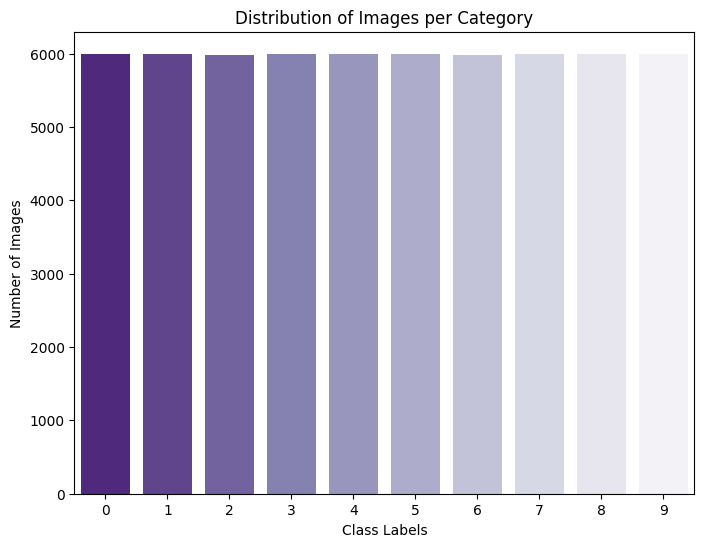

In [ ]:
#bar chart to see how many images belong to one category

y= data.iloc[:, 0].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=y.index, y=y.values,palette="Purples_r")
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Category")
plt.show()
#histogram shows uniform distribution

In [ ]:
#normlization meaning scaling down to 0 to 1 from 0 to 255
data[data.columns[1:]] = data[data.columns[1:]].to_numpy(dtype=np.float64) / 255.0

#split the dataset

In [ ]:
train_val_data,test_data=train_test_split(data,test_size=0.2,random_state=42)
train_data,val_data=train_test_split(train_val_data,test_size=0.25,random_state=42)


In [ ]:
#input columns are pixel values and target column is labels
input_cols=list(train_data.columns)[1:]
target_col=train_data.columns[0]


In [ ]:
#making a copy so we don't mess with raw data
train_inputs=train_data[input_cols].copy()
train_targets=train_data[target_col].copy()


val_inputs=val_data[input_cols].copy()
val_targets=val_data[target_col].copy()

test_inputs=test_data[input_cols].copy()
test_targets=test_data[target_col].copy()

#training the model

In [ ]:
model=LogisticRegression(solver='saga', max_iter=1000)

In [ ]:
# Reduce dataset size to speed up training
small_train_data = train_data.sample(n=10000, random_state=42)
small_train_inputs = small_train_data[input_cols].copy()
small_train_targets = small_train_data[target_col].copy()



In [ ]:
# Train model on smaller dataset
model.fit(small_train_inputs, small_train_targets)

LogisticRegression(max_iter=1000, solver='saga')

#evaluting the model

In [ ]:
train_preds=model.predict(train_inputs)

In [ ]:
train_preds

array([0, 9, 9, ..., 6, 1, 4])

In [ ]:
train_targets

,label
38574,6
47268,9
20997,7
3409,0
24771,0
...,...
9371,6
25235,5
10551,6
23741,1


In [ ]:
accuracy_score(train_targets,train_preds)

0.8608122758735719

In [ ]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[8.16091954e-01, 3.08382394e-03, 1.96243342e-02, 3.84076255e-02,
        3.92486683e-03, 2.24278105e-03, 1.07653490e-01, 2.80347631e-04,
        8.69077656e-03, 0.00000000e+00],
       [2.50000000e-03, 9.66666667e-01, 4.72222222e-03, 1.94444444e-02,
        2.77777778e-03, 0.00000000e+00, 3.88888889e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.69821826e-02, 3.34075724e-03, 7.73385301e-01, 9.46547884e-03,
        1.01893096e-01, 1.39198218e-03, 8.85300668e-02, 0.00000000e+00,
        5.01113586e-03, 0.00000000e+00],
       [3.69024322e-02, 1.20212469e-02, 9.50517193e-03, 8.73916690e-01,
        3.21498462e-02, 0.00000000e+00, 3.24294101e-02, 5.59127761e-04,
        2.51607492e-03, 0.00000000e+00],
       [4.46677834e-03, 3.35008375e-03, 9.54773869e-02, 2.95924065e-02,
        7.78894472e-01, 0.00000000e+00, 8.40312674e-02, 0.00000000e+00,
        4.18760469e-03, 0.00000000e+00],
       [1.09619074e-03, 8.22143053e-04, 0.00000000e+00, 2.74047684e-04,
   

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
val_preds

array([6, 3, 9, ..., 3, 0, 9])

In [ ]:
val_targets

,label
29144,6
43621,3
32955,9
43017,4
48448,9
...,...
5723,8
52813,1
50324,3
33365,0


In [ ]:
accuracy_score(val_targets,val_preds)

0.8327218145430287

In [ ]:
confusion_matrix(val_targets,val_preds,normalize='true')

array([[7.75876121e-01, 8.96495518e-03, 1.95599022e-02, 4.80847596e-02,
        4.88997555e-03, 8.14995925e-04, 1.27954360e-01, 0.00000000e+00,
        1.30399348e-02, 8.14995925e-04],
       [3.25732899e-03, 9.67426710e-01, 1.62866450e-03, 2.19869707e-02,
        3.25732899e-03, 8.14332248e-04, 1.62866450e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.27081581e-02, 3.36417157e-03, 7.18250631e-01, 1.76619008e-02,
        1.29520606e-01, 8.41042893e-04, 9.92430614e-02, 0.00000000e+00,
        8.41042893e-03, 0.00000000e+00],
       [4.01968827e-02, 1.39458573e-02, 1.55865463e-02, 8.63002461e-01,
        3.52748154e-02, 8.20344545e-04, 2.78917145e-02, 0.00000000e+00,
        3.28137818e-03, 0.00000000e+00],
       [6.81431005e-03, 1.70357751e-03, 1.21805792e-01, 4.17376491e-02,
        7.32538330e-01, 8.51788756e-04, 9.11413969e-02, 0.00000000e+00,
        3.40715503e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.77462289e-03,
   

In [ ]:
test_preds=model.predict(test_inputs)

In [ ]:
test_preds

array([5, 8, 2, ..., 2, 3, 6])

In [ ]:
test_targets

,label
20276,5
49313,8
41652,2
212,4
16842,9
...,...
45128,5
2829,6
16383,4
9737,3


In [ ]:
accuracy_score(test_targets,test_preds)

0.829219479653102

accuracy score on test data is 82.98 which is good


In [ ]:
confusion_matrix(test_targets,test_preds,normalize='true')

array([[7.80730897e-01, 6.64451827e-03, 2.99003322e-02, 4.23588040e-02,
        4.15282392e-03, 3.32225914e-03, 1.13787375e-01, 0.00000000e+00,
        1.57807309e-02, 3.32225914e-03],
       [4.28082192e-03, 9.47773973e-01, 2.56849315e-03, 3.33904110e-02,
        3.42465753e-03, 8.56164384e-04, 6.84931507e-03, 8.56164384e-04,
        0.00000000e+00, 0.00000000e+00],
       [2.81690141e-02, 5.79950290e-03, 7.29080365e-01, 1.24275062e-02,
        1.10190555e-01, 8.28500414e-04, 1.06048053e-01, 0.00000000e+00,
        6.62800331e-03, 8.28500414e-04],
       [3.91340550e-02, 2.08159867e-02, 1.33222315e-02, 8.45961699e-01,
        3.74687760e-02, 8.32639467e-04, 3.83014155e-02, 0.00000000e+00,
        4.16319734e-03, 0.00000000e+00],
       [4.84261501e-03, 4.84261501e-03, 1.17836965e-01, 4.51977401e-02,
        7.09443099e-01, 0.00000000e+00, 1.14608555e-01, 0.00000000e+00,
        3.22841001e-03, 0.00000000e+00],
       [1.63398693e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [ ]:
#loss metric
test_probs = model.predict_proba(test_inputs)
test_loss = log_loss(test_targets, test_probs)
print("Log Loss on Test Set:", test_loss)

Log Loss on Test Set: 0.5205343288764999


Log Loss on Test Set: 0.5415326561840472 which is good


#Implementing explainable AI techniques to the data



we'll figure out which pixels contribute the most to predicting a clothing category.

In [ ]:
weight=model.coef_.tolist()

In [ ]:
weight_df = pd.DataFrame({
    'feature':input_cols,
    'weight':model.coef_.tolist()[0]
})

<Axes: xlabel='feature', ylabel='weight'>

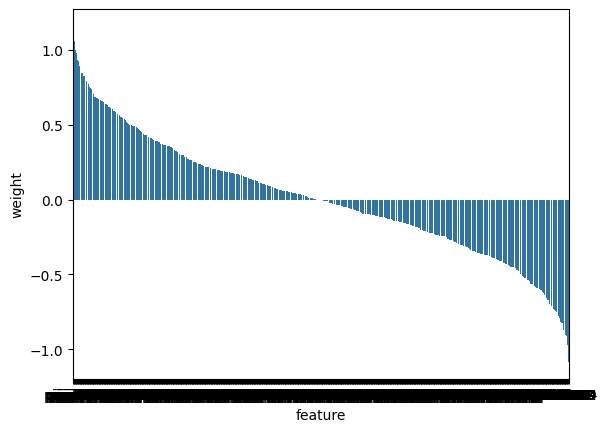

In [ ]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False),x='feature',y='weight')

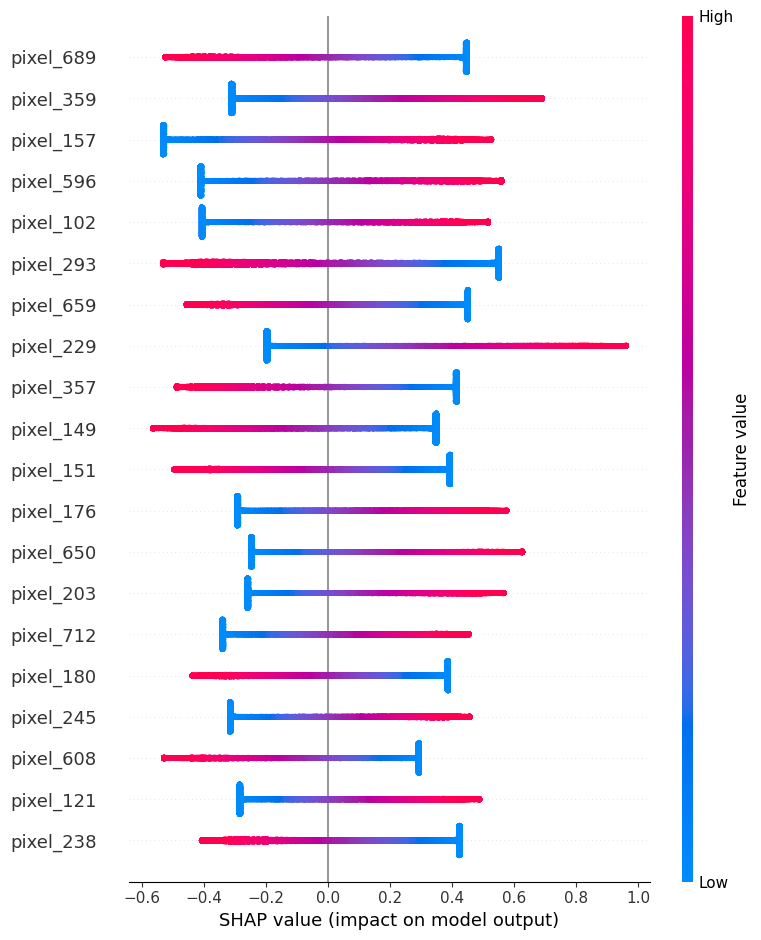

In [ ]:
class_idx = 0
shap_importance = np.abs(shap_values_array[:, :, class_idx]).mean(axis=0)
sorted_indices = np.argsort(shap_importance)[::-1]
sorted_features = val_inputs.iloc[:, sorted_indices]
shap.summary_plot(shap_values_array[:, sorted_indices, class_idx], sorted_features, feature_names=sorted_features.columns)

